#  Conflict Impact Analysis Global


## Methodological summary

- Geography: 160 countries across all WB regions. 153 countries have conflict-related data. 159 countries have population data.
- Countries excluded (no / insufficient data): Micronesia, Fed. Sts.; Hong Kong SAR, China; Macao SAR, China; Turkmenistan; Kosovo; Grenada; St. Kitts and Nevis; Turks and Caicos Islands.
- 58 countries have high fatality conflicts. 
- Timeline: 2024-01-01 to 2024-12-31.
- Source: ACLED conflict events; population overlays from WorldPop 2020 (UN‑adjusted).

**Conflict definition**
- Only events with at least one fatality are counted for events and fatalities.
- Peaceful protests are excluded. Protest categories are included only when the fatality threshold is met: Protest with intervention; Excessive force against protesters.
- Other ACLED event types retained (subject to the fatality filter): Battles; Explosions / Remote violence; Violence against civilians; Riots; Strategic developments.

**Population data**
- WorldPop 2020 UN‑adjusted population raster. Totals are sums of WorldPop 2020 (not official census figures), so country totals may differ from WB official figures.

**Spatial aggregation and grid size**
- Gridding scheme: Bing quadkey tiles clipped to country boundaries (zoom level 12 ≈ 60–80 km²).

**Exposed population definition**
People living in the same grid tile with a cumulative ≥10 conflict fatalities during the study period.
- A tile is considered impacted if cumulative conflict events in that tile had at least ten fatalities.
- Exposed population = sum of population in impacted tiles within a country.
- Percent exposed = 100 × (exposed population) / (total population from WorldPop 2020) computed per region, per country.

**Notes and caveats**
- Grid area varies with latitude; figures are approximate.
- Excluding Peaceful protest and zero-fatality events reduces counts relative to broader unrest measures.
- ACLED event geocoding precision varies; interpret results with this uncertainty in mind.
- Population is assumed static at projected 2020 values.


In [702]:
%reload_ext autoreload
%autoreload 2

import os
import acled_conflict_analysis as acled
from acled_conflict_analysis import visuals
from acled_conflict_analysis import processing
from acled_conflict_analysis import extraction


from bokeh.plotting import show, output_notebook
from bokeh.io import output_file

from bokeh.core.validation.warnings import EMPTY_LAYOUT, MISSING_RENDERERS
from bokeh.models import Panel, Tabs, TabPanel, HoverTool

from datetime import date
from datetime import datetime
import geopandas as gpd
import pandas as pd
from conflict_visuals import *

In [703]:
START_DATE1 = "2024-01-01"
END_DATE1 = "2024-12-31"

In [704]:
wb_regions = pd.read_csv('../../data/worldbank_regions_iso3_exclusions.csv')
wb_regions['region_name'] = wb_regions['region_name'].str.strip()
len(wb_regions['country_code'].unique())

213

In [705]:
countries_to_exclude = list(wb_regions[wb_regions['exclude']==1.0]['country_code'].unique())
len(countries_to_exclude)

53

In [706]:
import pycountry

wb_regions['country_numcode'] = wb_regions['country_code'].apply(lambda x: pycountry.countries.get(alpha_3=x).numeric if pycountry.countries.get(alpha_3=x) else None)
wb_regions['country_numcode'] = wb_regions['country_numcode'].astype('Int64')
wb_regions.loc[wb_regions['country_code']=='XKX', 'country_numcode'] = 926
wb_regions = wb_regions[wb_regions['exclude']!=1.0]
len(wb_regions['country_code'].unique())

160

In [707]:
wb_regions = wb_regions[wb_regions['country_numcode'].notna()]
len(wb_regions['country_code'].unique())

160

In [708]:
eap = list(wb_regions[wb_regions['region_name']=='East Asia & Pacific']['country_numcode'])
sar = list(wb_regions[wb_regions['region_name']=='South Asia']['country_numcode'])
ssa = list(wb_regions[wb_regions['region_name']=='Sub-Saharan Africa']['country_numcode'])
lac = list(wb_regions[wb_regions['region_name']=='Latin America & Caribbean']['country_numcode'])
eca = list(wb_regions[wb_regions['region_name']=='Europe & Central Asia']['country_numcode'])
mea = list(wb_regions[wb_regions['region_name']=='Middle East, North Africa, Afghanistan & Pakistan']['country_numcode'])

eap_names = list(wb_regions[wb_regions['region_name']=='East Asia & Pacific']['country_name'])
sar_names = list(wb_regions[wb_regions['region_name']=='South Asia']['country_name'])
ssa_names = list(wb_regions[wb_regions['region_name']=='Sub-Saharan Africa']['country_name'])
lac_names = list(wb_regions[wb_regions['region_name']=='Latin America & Caribbean']['country_name'])
eca_names = list(wb_regions[wb_regions['region_name']=='Europe & Central Asia']['country_name'])
mea_names = list(wb_regions[wb_regions['region_name']=='Middle East, North Africa, Afghanistan & Pakistan']['country_name'])

In [709]:
# EAP
data_eap = extraction.acled_api(country_codes=eap, start_date=START_DATE1, end_date=END_DATE1)
data_macao = extraction.acled_api(country_codes=[446], start_date=START_DATE1, end_date=END_DATE1)
data_eap = pd.concat([data_eap, data_macao], ignore_index=True)

# # # # SAR
data_sar = extraction.acled_api(country_codes=sar, start_date=START_DATE1, end_date=END_DATE1)

# # # # SSA
data_ssa = extraction.acled_api(country_codes=ssa, start_date=START_DATE1, end_date=END_DATE1)

# # # # ECA
data_eca = extraction.acled_api(country_codes=eca, start_date=START_DATE1, end_date=END_DATE1)
data_kosovo = extraction.acled_api(countries = ['Kosovo'], start_date=START_DATE1, end_date=END_DATE1)
data_eca = pd.concat([data_eca, data_kosovo], ignore_index=True)

# # # # LAC
data_lac = extraction.acled_api(country_codes=lac, start_date=START_DATE1, end_date=END_DATE1)

data_mea = extraction.acled_api(country_codes=mea, start_date=START_DATE1, end_date=END_DATE1)

🔄 Using cached OAuth token
URL: https://acleddata.com/api/acled/read
Parameters: {'_format': 'json', 'limit': 4000000, 'iso': '156|242|583|344|360|116|296|418|446|104|496|458|608|598|408|090|764|626|776|798|704|548', 'event_date': '2024-01-01|2024-12-31', 'event_date_where': 'BETWEEN', 'population': 'full', 'fields': 'region|country|iso|year|event_date|source|admin1|admin2|admin3|location|event_type|sub_event_type|interaction|fatalities|timestamp|latitude|longitude|actor1|actor2|notes|population_1km|population_5km|population_2km|population_best'}


/Users/ssarva/Library/CloudStorage/OneDrive-WBG/Documents/MENA-FCV-economic-monitor/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'acleddata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Successfully retrieved 24416 records
🔄 Using cached OAuth token
URL: https://acleddata.com/api/acled/read
Parameters: {'_format': 'json', 'limit': 4000000, 'iso': '446', 'event_date': '2024-01-01|2024-12-31', 'event_date_where': 'BETWEEN', 'population': 'full', 'fields': 'region|country|iso|year|event_date|source|admin1|admin2|admin3|location|event_type|sub_event_type|interaction|fatalities|timestamp|latitude|longitude|actor1|actor2|notes|population_1km|population_5km|population_2km|population_best'}


/Users/ssarva/Library/CloudStorage/OneDrive-WBG/Documents/MENA-FCV-economic-monitor/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'acleddata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Successfully retrieved 0 records
🔄 Using cached OAuth token
URL: https://acleddata.com/api/acled/read
Parameters: {'_format': 'json', 'limit': 4000000, 'iso': '050|064|356|144|462|524', 'event_date': '2024-01-01|2024-12-31', 'event_date_where': 'BETWEEN', 'population': 'full', 'fields': 'region|country|iso|year|event_date|source|admin1|admin2|admin3|location|event_type|sub_event_type|interaction|fatalities|timestamp|latitude|longitude|actor1|actor2|notes|population_1km|population_5km|population_2km|population_best'}


/Users/ssarva/Library/CloudStorage/OneDrive-WBG/Documents/MENA-FCV-economic-monitor/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'acleddata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Successfully retrieved 33623 records
🔄 Using cached OAuth token
URL: https://acleddata.com/api/acled/read
Parameters: {'_format': 'json', 'limit': 4000000, 'iso': '024|108|204|854|072|140|384|120|180|178|174|132|232|231|266|288|324|270|624|226|404|430|426|450|466|508|478|480|454|516|562|566|646|729|686|694|706|728|678|748|148|768|834|800|710|894|716', 'event_date': '2024-01-01|2024-12-31', 'event_date_where': 'BETWEEN', 'population': 'full', 'fields': 'region|country|iso|year|event_date|source|admin1|admin2|admin3|location|event_type|sub_event_type|interaction|fatalities|timestamp|latitude|longitude|actor1|actor2|notes|population_1km|population_5km|population_2km|population_best'}


/Users/ssarva/Library/CloudStorage/OneDrive-WBG/Documents/MENA-FCV-economic-monitor/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'acleddata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Successfully retrieved 44776 records
🔄 Using cached OAuth token
URL: https://acleddata.com/api/acled/read
Parameters: {'_format': 'json', 'limit': 4000000, 'iso': '008|051|031|100|070|112|268|191|348|398|417|438|440|428|498|807|499|616|642|643|688|703|705|762|795|792|804|860|926', 'event_date': '2024-01-01|2024-12-31', 'event_date_where': 'BETWEEN', 'population': 'full', 'fields': 'region|country|iso|year|event_date|source|admin1|admin2|admin3|location|event_type|sub_event_type|interaction|fatalities|timestamp|latitude|longitude|actor1|actor2|notes|population_1km|population_5km|population_2km|population_best'}


/Users/ssarva/Library/CloudStorage/OneDrive-WBG/Documents/MENA-FCV-economic-monitor/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'acleddata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Successfully retrieved 85391 records
🔄 Using cached OAuth token
URL: https://acleddata.com/api/acled/read
Parameters: {'_format': 'json', 'limit': 4000000, 'iso': '000', 'event_date': '2024-01-01|2024-12-31', 'event_date_where': 'BETWEEN', 'population': 'full', 'fields': 'region|country|iso|year|event_date|source|admin1|admin2|admin3|location|event_type|sub_event_type|interaction|fatalities|timestamp|latitude|longitude|actor1|actor2|notes|population_1km|population_5km|population_2km|population_best'}


/Users/ssarva/Library/CloudStorage/OneDrive-WBG/Documents/MENA-FCV-economic-monitor/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'acleddata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Successfully retrieved 161 records
🔄 Using cached OAuth token
URL: https://acleddata.com/api/acled/read
Parameters: {'_format': 'json', 'limit': 4000000, 'iso': '032|084|068|076|052|152|170|188|192|531|136|212|214|218|308|320|328|340|332|388|659|662|663|484|558|591|604|600|222|740|796|780|858|670|862', 'event_date': '2024-01-01|2024-12-31', 'event_date_where': 'BETWEEN', 'population': 'full', 'fields': 'region|country|iso|year|event_date|source|admin1|admin2|admin3|location|event_type|sub_event_type|interaction|fatalities|timestamp|latitude|longitude|actor1|actor2|notes|population_1km|population_5km|population_2km|population_best'}


/Users/ssarva/Library/CloudStorage/OneDrive-WBG/Documents/MENA-FCV-economic-monitor/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'acleddata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Successfully retrieved 49828 records
🔄 Using cached OAuth token
URL: https://acleddata.com/api/acled/read
Parameters: {'_format': 'json', 'limit': 4000000, 'iso': '004|784|048|262|012|818|364|368|400|414|422|434|504|512|586|275|634|682|760|788|887', 'event_date': '2024-01-01|2024-12-31', 'event_date_where': 'BETWEEN', 'population': 'full', 'fields': 'region|country|iso|year|event_date|source|admin1|admin2|admin3|location|event_type|sub_event_type|interaction|fatalities|timestamp|latitude|longitude|actor1|actor2|notes|population_1km|population_5km|population_2km|population_best'}


/Users/ssarva/Library/CloudStorage/OneDrive-WBG/Documents/MENA-FCV-economic-monitor/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'acleddata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Successfully retrieved 96123 records


In [710]:
# Check for differences between eap_names and data_eap['country'].unique()

eap_codes_set = set(eap)
data_eap_countries_set = set(data_eap['iso'].unique())

# Countries in eap_names not in data_eap['country']
not_in_data = eap_codes_set - data_eap_countries_set

# Countries in data_eap['country'] not in eap_names
not_in_eap_names = data_eap_countries_set - eap_codes_set

print("Countries in eap_names but not in data_eap['country']:", not_in_data)
print("Countries in data_eap['country'] but not in eap_names:", not_in_eap_names)

# ECA
eca_codes_set = set(eca)
data_eca_countries_set = set(data_eca['iso'].unique())
not_in_data_eca = eca_codes_set - data_eca_countries_set
not_in_eca_names = data_eca_countries_set - eca_codes_set
print("Countries in eca_names but not in data_eca['country']:", not_in_data_eca)
print("Countries in data_eca['country'] but not in eca_names:", not_in_eca_names)

# LAC
lac_codes_set = set(lac)
data_lac_countries_set = set(data_lac['iso'].unique())
not_in_data_lac = lac_codes_set - data_lac_countries_set
not_in_lac_names = data_lac_countries_set - lac_codes_set
print("Countries in lac_names but not in data_lac['country']:", not_in_data_lac)
print("Countries in data_lac['country'] but not in lac_names:", not_in_lac_names)

# MEA
mea_codes_set = set(mea)
data_mea_countries_set = set(data_mea['iso'].unique())
not_in_data_mea = mea_codes_set - data_mea_countries_set
not_in_mea_names = data_mea_countries_set - mea_codes_set
print("Countries in mea_names but not in data_mea['country']:", not_in_data_mea)
print("Countries in data_mea['country'] but not in mea_names:", not_in_mea_names)

# SAR
sar_codes_set = set(sar)
data_sar_countries_set = set(data_sar['iso'].unique())
not_in_data_sar = sar_codes_set - data_sar_countries_set
not_in_sar_names = data_sar_countries_set - sar_codes_set
print("Countries in sar_names but not in data_sar['country']:", not_in_data_sar)
print("Countries in data_sar['country'] but not in sar_names:", not_in_sar_names)

# SSA
ssa_codes_set = set(ssa)
data_ssa_countries_set = set(data_ssa['iso'].unique())
not_in_data_ssa = ssa_codes_set - data_ssa_countries_set
not_in_ssa_names = data_ssa_countries_set - ssa_codes_set
print("Countries in ssa_names but not in data_ssa['country']:", not_in_data_ssa)
print("Countries in data_ssa['country'] but not in ssa_names:", not_in_ssa_names)

# Concatenate all "not in data" sets into a single set
all_not_in_data = (
    not_in_data |
    not_in_data_eca |
    not_in_data_lac |
    not_in_data_mea |
    not_in_data_sar |
    not_in_data_ssa
)
print("All country codes in region lists but not in data:", all_not_in_data)

Countries in eap_names but not in data_eap['country']: {np.int64(344), np.int64(446), np.int64(583)}
Countries in data_eap['country'] but not in eap_names: set()
Countries in eca_names but not in data_eca['country']: {np.int64(795), np.int64(926)}
Countries in data_eca['country'] but not in eca_names: {np.int64(0)}
Countries in lac_names but not in data_lac['country']: {np.int64(659), np.int64(796), np.int64(308)}
Countries in data_lac['country'] but not in lac_names: set()
Countries in mea_names but not in data_mea['country']: set()
Countries in data_mea['country'] but not in mea_names: set()
Countries in sar_names but not in data_sar['country']: set()
Countries in data_sar['country'] but not in sar_names: set()
Countries in ssa_names but not in data_ssa['country']: set()
Countries in data_ssa['country'] but not in ssa_names: set()
All country codes in region lists but not in data: {np.int64(446), np.int64(583), np.int64(659), np.int64(308), np.int64(344), np.int64(795), np.int64(796)

In [711]:
missing_countries = wb_regions[wb_regions['country_numcode'].isin(all_not_in_data)]['country_name'].tolist()
missing_countries

['Micronesia, Fed. Sts.',
 'Hong Kong SAR, China',
 'Macao SAR, China',
 'Turkmenistan',
 'Kosovo',
 'Grenada',
 'St. Kitts and Nevis',
 'Turks and Caicos Islands']

In [712]:
# Combine all regional dataframes into a single global dataframe
global_df = pd.concat([
    data_sar,
    data_ssa,
    data_eap,
    data_lac,
    data_eca,
    data_mea,
    data_kosovo
], ignore_index=True)

global_df.drop_duplicates(inplace=True)

print(f"Global dataframe shape: {global_df.shape}")

Global dataframe shape: (334239, 24)


In [713]:
missing_not_in_global = set(missing_countries) - set(global_df['country'].unique())
print("Missing countries not present in global_df['country']:", missing_not_in_global)
# set(global_df['country'].unique().tolist()) - set(missing_countries)

Missing countries not present in global_df['country']: {'St. Kitts and Nevis', 'Micronesia, Fed. Sts.', 'Macao SAR, China', 'Grenada', 'Hong Kong SAR, China', 'Turkmenistan', 'Turks and Caicos Islands'}


In [714]:
wb_regions_clean = wb_regions[~(wb_regions['country_numcode'].isin(all_not_in_data))]
global_df['wb_region'] = global_df['iso'].map(wb_regions_clean.set_index('country_numcode')['region_name'])
global_df.loc[global_df['country']=='Kosovo', 'wb_region'] = 'Europe & Central Asia'
global_df.loc[global_df['iso']==0, 'iso'] = 926

In [715]:
country_numcode_mapping = wb_regions[['country_numcode', 'country_code']].drop_duplicates().set_index('country_numcode').to_dict()['country_code']

In [716]:
global_df['country_code'] = global_df['iso'].map(country_numcode_mapping)

In [717]:
data = global_df
data.drop_duplicates(inplace=True)
data.shape

(334239, 26)

In [718]:
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data.sort_values(by='timestamp', inplace=True, ascending=False)

In [719]:
processing.data_type_conversion(data)

In [720]:
data = data[data['sub_event_type']!='Peaceful protest']
data = data[data['fatalities']>0]
#data['wb_region'] = wb_region

In [721]:
extracted_date = datetime.today().strftime('%Y%m%d')

last_date = data['event_date'].max()
last_date = last_date.strftime('%d %B %Y')
extracted_date_formatted = datetime.today().strftime('%d %B %Y')

In [722]:
#data['country_code'] = data['iso'].map(country_numcode_mapping)
data = data[~data['country_code'].isin(countries_to_exclude)]

In [723]:
#countries after filtering out exclusions
data['country_code'].nunique()

115

In [724]:
data.to_csv(f'../../data/conflict/acled_global_raw_no_peaceful_protest_one_fatality{extracted_date}.csv')

## Conflict Events and Fatalities

In [725]:
start = data['event_date'].min().year
end = data['event_date'].max().year

In [726]:
import pandas as pd

# Build tidy table (keep 'wb_region' as a normal column; avoid resetting/setting index repeatedly)
global_events = processing.get_acled_by_group(data, 'wb_region')

# If the function returned 'wb_region' as the index, move it back to a column once
if 'wb_region' not in global_events.columns and getattr(global_events.index, 'name', None) == 'wb_region':
    global_events = global_events.reset_index()

# Optional: enforce a clean column order when present
cols = [c for c in ['wb_region', 'nrEvents', 'nrFatalities'] if c in global_events.columns]
if cols:
    global_events = global_events[cols]


def style_global_events_table(df, title=f"Conflict Events and Fatalities by World Bank Region with atleast 1 casualty ({start}-{end})"):
    s = (
        df.style
        .set_caption(title)
        .format({'nrFatalities': '{:,}', 'nrEvents': '{:,}'})
        .set_table_styles([
            {'selector': 'caption', 'props': [('font-size', '18px'), ('font-weight', 'bold'), ('text-align', 'left')]},
            {'selector': 'th.col_heading', 'props': [('text-align', 'left')]},
            {'selector': 'td', 'props': [('text-align', 'left')]},
        ])
        .background_gradient(subset=[c for c in ['nrFatalities'] if c in df.columns], cmap='Reds')
        .background_gradient(subset=[c for c in ['nrEvents'] if c in df.columns], cmap='Reds')
    )
    # Robustly hide the index (prevents the left-most blank/index column and header shift)
    try:
        s = s.hide(axis='index')  # pandas >= 1.4
    except Exception:
        s = s.hide_index()        # older pandas fallback
    return s

style_global_events_table(global_events)


wb_region,nrEvents,nrFatalities
East Asia & Pacific,"5,122","21,225"
Europe & Central Asia,"12,924","78,394"
Latin America & Caribbean,"16,894","25,669"
"Middle East, North Africa, Afghanistan & Pakistan","12,905","50,882"
South Asia,"1,406","3,137"
Sub-Saharan Africa,"14,725","66,949"


In [727]:
conflict_national = processing.get_acled_by_group(data, columns=['country'], freq='YS')
conflict_national = conflict_national.groupby(['country'])[['nrEvents', 'nrFatalities']].sum().reset_index()
conflict_national.to_csv(f'../../data/conflict/acled_global_national_annual_one_fatality_no_peaceful_protest_{extracted_date}')

In [728]:
conflict_national.loc[conflict_national['country']=='Palestine', 'country'] = 'West Bank and Gaza'
#regional_boundary_grids.loc[regional_boundary_grids['country'] == 'Syrian Arab Republic', 'country'] = 'Syria'

conflict_regional_yearly = processing.get_acled_by_group(data, ['wb_region'],freq='YS')
conflict_regional_yearly.to_csv(f'../../data/acled_global_regional_one_fatality_no_peaceful_protest_{extracted_date}')

In [729]:
def tile_to_quadkey(x, y, z):
    quadkey = ''
    for i in range(z, 0, -1):
        digit = 0
        mask = 1 << (i - 1)
        if (x & mask) != 0:
            digit += 1
        if (y & mask) != 0:
            digit += 2
        quadkey += str(digit)
    return quadkey

import mercantile
def get_quadkey_from_lat_lon(lat, lon, zoom=12):
    
    tile = mercantile.tile(lon, lat, zoom)
    quadkey = mercantile.quadkey(tile)
    return quadkey

In [730]:
# Helpers: bounds from a quadkey (Bing)
import pandas as pd
import mercantile
from shapely.geometry import box


def quadkey_to_bounds(quadkey, as_polygon=False):
    """Return bounds for a Bing quadkey.

    Parameters
    - quadkey: str or iterable of quadkeys
    - as_polygon: if True, return shapely Polygon(s) instead of (west, south, east, north)

    Returns
    - tuple (w, s, e, n) for a single quadkey, or list of tuples for an iterable
      If as_polygon=True, returns a shapely Polygon or list of Polygons.
    """
    def _one(qk):
        t = mercantile.quadkey_to_tile(str(qk))
        b = mercantile.bounds(t)
        if as_polygon:
            return box(b.west, b.south, b.east, b.north)
        return (b.west, b.south, b.east, b.north)

    if isinstance(quadkey, (list, tuple, set, pd.Series, pd.Index)):
        return [_one(qk) for qk in list(quadkey)]
    return _one(quadkey)


def add_bounds_from_quadkey(df, qk_col='index', out_cols=('west', 'south', 'east', 'north')):
    """Append bounding box columns to a DataFrame with a quadkey column.

    Parameters
    - df: DataFrame containing a column of quadkeys
    - qk_col: name of the quadkey column (default 'index')
    - out_cols: 4-tuple of column names for (west, south, east, north)

    Returns
    - A new DataFrame with the four bound columns added.
    """
    bounds_series = df[qk_col].astype(str).apply(quadkey_to_bounds)
    bounds_df = pd.DataFrame(bounds_series.tolist(), columns=list(out_cols), index=df.index)
    return pd.concat([df, bounds_df], axis=1)

# Example usage:
# w, s, e, n = quadkey_to_bounds(global_df.iloc[0]['index'])
# data_with_bounds = add_bounds_from_quadkey(global_df, qk_col='index')

In [731]:
global_df['index'] = global_df.apply(lambda row: get_quadkey_from_lat_lon(row['latitude'], row['longitude'], zoom=12), axis=1)
data['index'] = data.apply(lambda row: get_quadkey_from_lat_lon(row['latitude'], row['longitude'], zoom=12), axis=1)

In [732]:
region_name_code_mapping = wb_regions[['region_name', 'region_code']].drop_duplicates().set_index(['region_name']).to_dict()['region_code']

In [733]:
data['region_code'] = data['wb_region'].map(region_name_code_mapping)

In [734]:
global_national_quad12 = processing.get_acled_by_group(data, ['country', 'country_code', 'region_code', 'wb_region', 'index'])
global_national_quad12['nrEvents'].sum()
global_national_quad12_10f = global_national_quad12[global_national_quad12['nrFatalities']>=10]

global_regional_quad12 = processing.get_acled_by_group(data, [ 'region_code', 'wb_region', 'index'])
global_regional_quad12['nrEvents'].sum()
global_regional_quad12_10f = global_regional_quad12[global_regional_quad12['nrFatalities']>=10]

In [735]:
print(global_national_quad12['country'].nunique())
global_national_quad12_10f['country'].nunique()

115


58

In [736]:
# Merge conflict_national_q13 with wb_regions on country_code, then check for mismatches in country_name
merged = global_national_quad12_10f.merge(
    wb_regions[['country_code', 'country_name']],
    left_on='country_code', right_on='country_code', how='left'
)

conflict_names = set(merged['country_code'].unique())
wb_names = set(wb_regions['country_code'].unique())

print("Countries in conflict_national_q13 but not in wb_regions:", conflict_names - wb_names)
print("Countries in wb_regions but not in conflict_national_q13:", wb_names - conflict_names)


Countries in conflict_national_q13 but not in wb_regions: set()
Countries in wb_regions but not in conflict_national_q13: {'TZA', 'GRD', 'THA', 'BTN', 'COG', 'DMA', 'SLB', 'GAB', 'KAZ', 'BHR', 'CHN', 'KHM', 'SAU', 'UZB', 'OMN', 'EGY', 'RWA', 'HKG', 'ZMB', 'LSO', 'SWZ', 'POL', 'CIV', 'LAO', 'LIE', 'MUS', 'AZE', 'ARG', 'MYS', 'URY', 'HUN', 'CPV', 'KNA', 'MNE', 'BRB', 'STP', 'QAT', 'ALB', 'CUW', 'TUN', 'TUR', 'KIR', 'TON', 'ZWE', 'SVK', 'BOL', 'XKX', 'PRY', 'PAN', 'ERI', 'SLV', 'MKD', 'CHL', 'JOR', 'VUT', 'KGZ', 'GUY', 'BWA', 'MDA', 'TJK', 'LCA', 'LBR', 'NPL', 'MDV', 'SRB', 'MRT', 'TUV', 'CYM', 'SUR', 'LKA', 'ROU', 'NAM', 'VNM', 'GMB', 'GEO', 'CRI', 'SLE', 'PER', 'FJI', 'CUB', 'MAF', 'NIC', 'COM', 'ARE', 'TCA', 'FSM', 'KWT', 'TLS', 'GNQ', 'ARM', 'MAC', 'SVN', 'MNG', 'LVA', 'LTU', 'VCT', 'GNB', 'TKM', 'DOM', 'BLR', 'SEN', 'BGR'}


In [737]:
#boundaries_quad12.reset_index().to_file('../../data/boundaries/MENAP_regional_quadkey12.gpkg')

## People living in the same grid tile location as a conflict event with a fatality

In [738]:
pop = pd.read_csv('../../data/population/polygons/global_pop_quad12.csv', dtype={'index':str})
countries_with_10f_quad12 = list(global_national_quad12_10f['country_code'].unique())
pop.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
pop = pop.drop_duplicates()

#pop = pop[pop['country_code'].isin(countries_with_10f_quad12)]
#set(pop['country_code'].unique()) - set(countries_with_10f_quad12)

In [739]:
russia = gpd.read_file('../../data/population/polygons/zoom12/gdf_RUS.gpkg')
russia_gdf = gpd.read_file('../../data/boundaries/zoom12/gdf_RUS_quad12.gpkg')
russia_gdf_idx = list(russia_gdf['index'].unique())
russia_pop = russia[russia['index'].isin(russia_gdf_idx)]
russia_pop['country_code'] = 'RUS'
russia_pop['region_code'] = 'ECS'

/Users/ssarva/Library/CloudStorage/OneDrive-WBG/Documents/MENA-FCV-economic-monitor/.venv/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/ssarva/Library/CloudStorage/OneDrive-WBG/Documents/MENA-FCV-economic-monitor/.venv/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [740]:
pop = pd.concat([pop, russia_pop])

In [741]:
pop_national_total = pd.read_csv('../../data/population/global_total_population_worldpop2020.csv')
pop_national_total.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
pop_national_total.drop_duplicates(inplace=True)
#pop_national_total.rename(columns={'population':'totalPopulation'}, inplace=T
# rue)

pop_regional_total = pop_national_total.groupby(['region_code'])['totalPopulation'].sum().reset_index()
#pop_regional_total.rename(columns={'population':'totalPopulation'}, inplace=True)

In [742]:
# data['index'] = data.apply(lambda row: get_quadkey_from_lat_lon(row['latitude'], row['longitude'], 12), axis=1)
# acled_group = data.groupby(['index', 'country_code', 'region_code']).agg({'fatalities':'sum', 'notes':'count', 'population_5km':'max'}).reset_index()
# acled_group = acled_group[acled_group['fatalities']>=10]
# acled_group.groupby(['region_code'])['population_5km'].sum()/1000000

In [743]:
from boundaries_utils import * 

def get_impacted_population(conflict, population, pop_total):

    merged = conflict.merge(pop[['index', 'population', 'region_code']],on=['index', 'region_code'], how='inner')
    #country codes are coming from ACLED
    impacted = merged.groupby(['region_code','country_code'])[['population']].sum().reset_index()
    impacted = impacted.merge(pop_total, on=['country_code', 'region_code'])

    impacted['pc_population'] = 100*impacted['population']/impacted['totalPopulation']

    #merged['country'] = merged['country_code'].map(iso_to_country)
    #merged.loc[merged['country']=='Palestine', 'country'] = 'West Bank and Gaza'

    return merged, impacted

In [744]:
impacted_quad12_no_merge = pd.DataFrame()
for region_code in pop.region_code.unique():
    idxs = global_national_quad12_10f[global_national_quad12_10f['region_code']==region_code]['index']
    pop_region_high_fat = pop[(pop['index'].isin(idxs))&(pop['region_code']==region_code)]
    impacted_quad12_no_merge = pd.concat([impacted_quad12_no_merge, pop_region_high_fat], ignore_index=True)

region_code_name_mapping = wb_regions[['region_code', 'region_name']].drop_duplicates().set_index(['region_code']).to_dict()['region_name']


impacted_quad12_no_merge['country'] = impacted_quad12_no_merge['country_code'].map(country_code_mapping)
impacted_quad12_no_merge['region'] = impacted_quad12_no_merge['region_code'].map(region_code_name_mapping)
 

In [745]:
high_fat = list(global_regional_quad12_10f['index'].unique())
high_fat_countries = list(global_national_quad12_10f['country_code'].unique())

impacted_quad12_no_merge.groupby(['region_code'])['population'].sum().reset_index()

,region_code,population
0,EAS,1.572945e+07
1,ECS,6.225269e+06
2,LCN,7.664290e+07
3,MEA,3.602778e+07
4,SAS,2.670542e+07
5,SSF,5.950702e+07


In [746]:
impacted_quad12_gdf = impacted_quad12_no_merge.copy()
impacted_quad12_gdf['geometry'] = impacted_quad12_gdf['index'].apply(lambda x: quadkey_to_bounds(x, as_polygon=True))
impacted_quad12_gdf = gpd.GeoDataFrame(impacted_quad12_gdf, geometry='geometry', crs= 'EPSG:4326')
impacted_quad12_gdf.to_file('../../data/conflict/global_10f_conflict.gpkg', driver='GPKG')

In [747]:
impacted_quad12_no_merge[impacted_quad12_no_merge['region_code']=='MEA']['population'].sum()

np.float64(36027781.11136627)

In [748]:
impacted_quad12_no_merge[impacted_quad12_no_merge['country_code']=='PSE']['population'].sum()

np.float64(3392185.6201171875)

In [749]:
impacted_national_quad12 = impacted_quad12_no_merge.groupby(['region_code', 'country_code', 'country', 'region'])[['population']].sum().reset_index()
impacted_national_quad12 = impacted_national_quad12.merge(pop_national_total[['country_code', 'totalPopulation']], on = ['country_code'])
impacted_national_quad12['pc_population'] = 100*impacted_national_quad12['population']/impacted_national_quad12['totalPopulation']

In [750]:
impacted_regional_quad12 = impacted_quad12_no_merge.groupby(['region_code', 'region'])[['population']].sum().reset_index()
impacted_regional_quad12 = impacted_regional_quad12.merge(pop_regional_total[['region_code', 'totalPopulation']], on = ['region_code'])
impacted_regional_quad12['pc_population'] = 100*impacted_regional_quad12['population']/impacted_regional_quad12['totalPopulation']

In [751]:
#conflict_national_q12.to_file(f'../../data/conflict/conflict_quad12_national_one_fatality_{extracted_date}.gpkg')

### People living in the same 60–80 km² grid tile (medium sized city) as a conflict with at least one fatality

In [862]:
pc_total_pop = np.round(100*impacted_quad12_no_merge['population'].sum()/pop_national_total['totalPopulation'].sum(),2)
print(f"{np.round(impacted_regional_quad12['population'].sum()/1_000_000,2)} million people living in the same area (60–80 km²) as a conflict event in 2024 globally. \nThis is {pc_total_pop}% of the total population.")

220.84 million people living in the same area (60–80 km²) as a conflict event in 2024 globally. 
This is 3.3% of the total population.


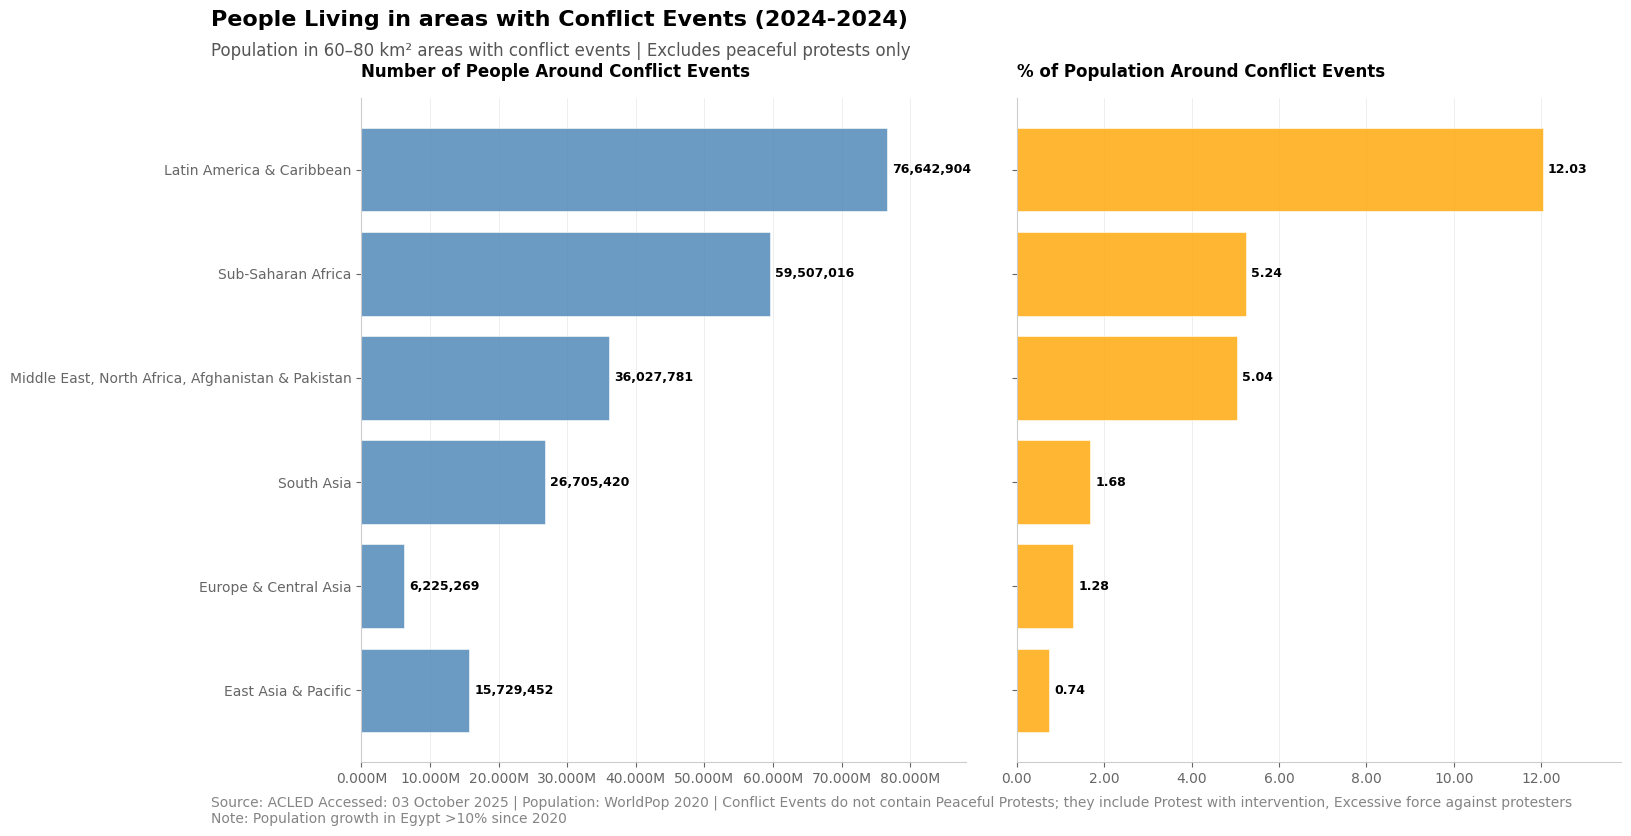

In [753]:
import altair as alt
alt.data_transformers.enable('json')
alt.renderers.enable('default')
from conflict_visuals import * 

plot_dual_metrics_by_country(
    data =impacted_regional_quad12,
    category_column='region',
    metrics_to_plot =['population', 'pc_population'],
    metric_display_info = {'population': {'title': 'Number of People Around Conflict Events', 'color': 'steelblue'},
                           'pc_population': {'title': '% of Population Around Conflict Events', 'color': 'orange'}},
    sorting_metric = 'pc_population',
    overall_title = f'People Living in areas with Conflict Events ({start}-{end})',
    chart_subtitle='Population in 60–80 km² areas with conflict events | Excludes peaceful protests only',
    source_text = f'Source: ACLED Accessed: {extracted_date_formatted} | Population: WorldPop 2020 | Conflict Events do not contain Peaceful Protests; they include Protest with intervention, Excessive force against protesters\nNote: Population growth in Egypt >10% since 2020',
);

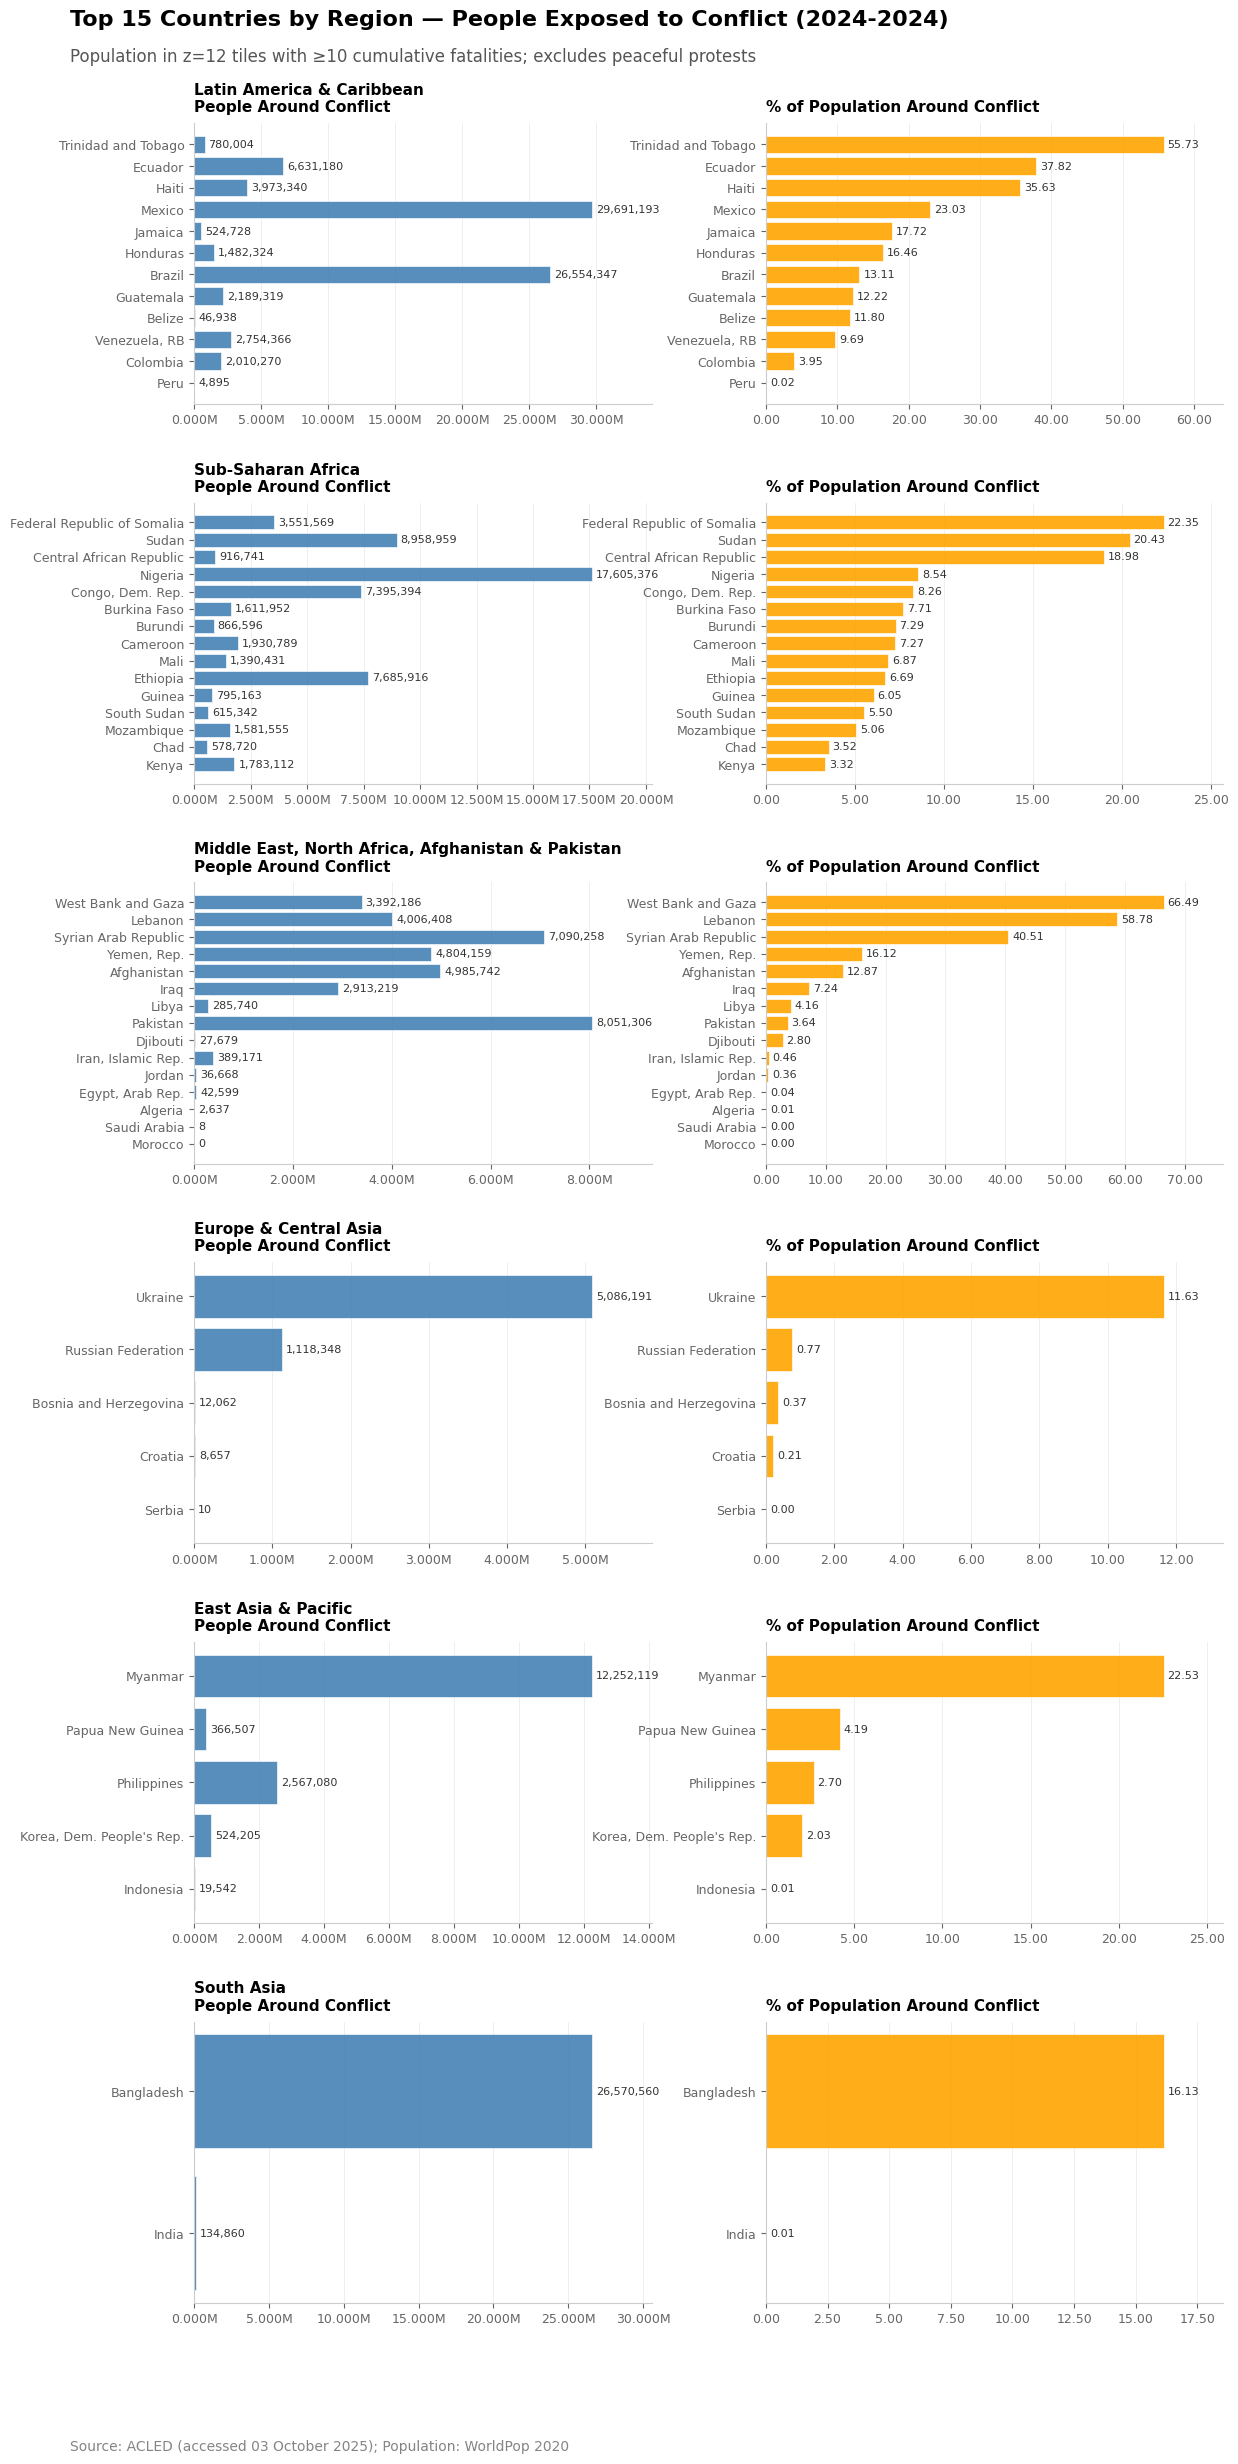

In [754]:
plot_top_countries_by_region( 
    data=impacted_national_quad12, 
    region_col='region', 
    category_col='country', 
    metrics_to_plot=['population', 'pc_population'], 
    #top_n=15,
    metric_display_info={ 'population': {'title': 'People Around Conflict', 'color': 'steelblue'}, 
                         'pc_population': {'title': '% of Population Around Conflict', 'color': 'orange'}, }, 
                         sorting_metric='pc_population', 
                         top_n=15, 
                         overall_title=f'Top 15 Countries by Region — People Exposed to Conflict ({start}-{end})', 
                         chart_subtitle='Population in z=12 tiles with ≥10 cumulative fatalities; excludes peaceful protests', 
                         source_text=f'Source: ACLED (accessed {extracted_date_formatted}); Population: WorldPop 2020', 
                         row_height=4.2, 
                         col_width=6.2,
                           );

## What type of conflicts are in these 'impacted' grids with more than 10 fatalities in 2024?

In [763]:
raw_10f = data[data['index'].isin(high_fat)]
raw_10f[raw_10f['region_code']=='MEA'].groupby(['event_type','sub_event_type'])['fatalities'].sum().reset_index().sort_values(by='fatalities', ascending=False)

,event_type,sub_event_type,fatalities
3,Explosions/Remote violence,Air/drone strike,25301
0,Battles,Armed clash,14517
6,Explosions/Remote violence,Shelling/artillery/missile attack,2883
13,Violence against civilians,Attack,1951
5,Explosions/Remote violence,Remote explosive/landmine/IED,1107
2,Battles,Non-state actor overtakes territory,337
7,Explosions/Remote violence,Suicide bomb,221
12,Strategic developments,Other,62
9,Riots,Mob violence,51
4,Explosions/Remote violence,Grenade,46


In [777]:
events_10f = raw_10f.groupby(['region_code', 'event_type', 'wb_region'])['fatalities'].sum().reset_index()
#events_10f_count = raw_10f.groupby(['region_code', 'event_type', 'wb_region'])['event_type'].count().reset_index(name='nrEvents')

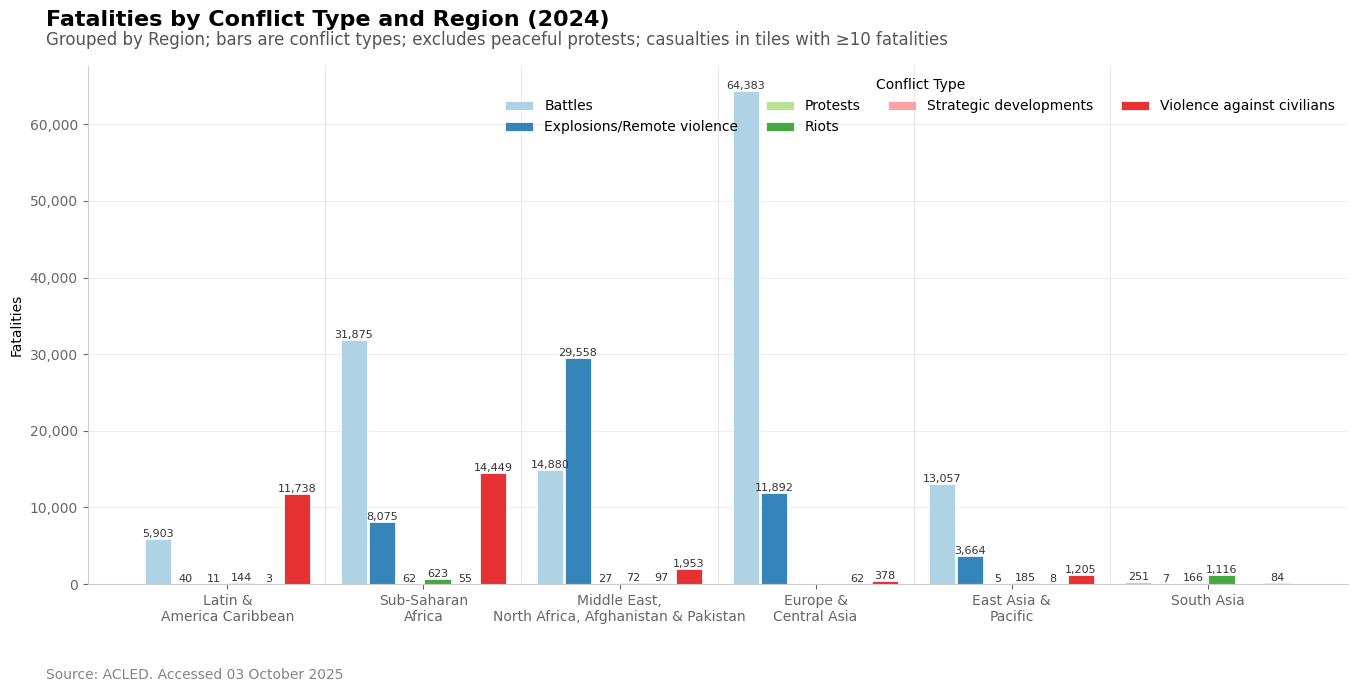

In [778]:
# Grouped bar chart: regions as groups, conflict types as bars, fatalities on Y
# Uses the new helper added to conflict_visuals.py
from conflict_visuals import plot_grouped_bars_by_region_eventtype

fig = plot_grouped_bars_by_region_eventtype(
    data=events_10f,
    region_col='wb_region',
    type_col='event_type',
    value_col='fatalities',
    overall_title='Fatalities by Conflict Type and Region (2024)',
    chart_subtitle='Grouped by Region; bars are conflict types; excludes peaceful protests; casualties in tiles with ≥10 fatalities',
    source_text=f'Source: ACLED. Accessed {extracted_date_formatted}',
    figsize=(14, 7),
    rotate_xticks=0,
    annotate=True,
)
fig;

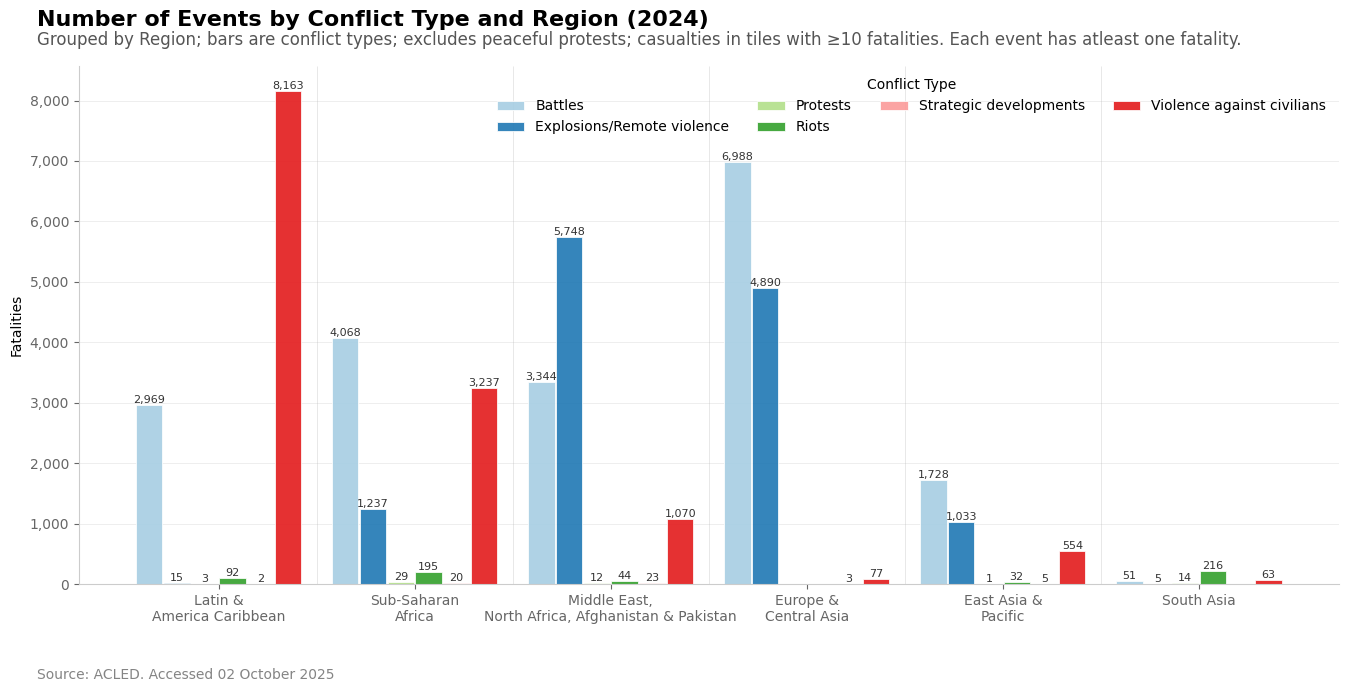

In [ ]:
# Grouped bar chart: regions as groups, conflict types as bars, fatalities on Y
# Uses the new helper added to conflict_visuals.py
from conflict_visuals import plot_grouped_bars_by_region_eventtype

fig = plot_grouped_bars_by_region_eventtype(
    data=events_10f_count,
    region_col='wb_region',
    type_col='event_type',
    value_col='nrEvents',
    overall_title='Number of Events by Conflict Type and Region (2024)',
    chart_subtitle='Grouped by Region; bars are conflict types; excludes peaceful protests; casualties in tiles with ≥10 fatalities. Each event has atleast one fatality.',
    source_text=f'Source: ACLED. Accessed {extracted_date_formatted}',
    figsize=(14, 7),
    rotate_xticks=0,
    annotate=True,
)
fig;

## Deep down into LAC

The numbers of LAC are higher than the other regions. A deeper dive into the kind of actors and events in Brazil and Mexico, the two countries with the most people exposed to conflict is shown here. 

1. Is it because of the population 

In [ ]:
raw_10f_lac = raw_10f[raw_10f['region_code']=='LCN']
pop_lcn = pop[pop['region_code']=='LCN']
pop_lcn['geometry'] = pop_lcn['index'].apply(lambda x: quadkey_to_bounds(x, as_polygon=True))
raw_10f_lac_gdf = processing.convert_to_gdf(raw_10f_lac)

In [821]:
mex_meta = pd.read_csv('../../data/population/meta/population_mex_2018-10-01.csv.zip')
mex_meta['index'] = mex_meta.apply(lambda x: get_quadkey_from_lat_lon(x['latitude'], x['longitude'],zoom=12 ), axis=1)

In [822]:
bra_meta = pd.concat([
    pd.read_csv('../../data/population/meta/population_bra_northeast_2018-10-01.csv.zip'),
    pd.read_csv('../../data/population/meta/population_bra_northwest_2018-10-01.csv.zip'),
    pd.read_csv('../../data/population/meta/population_bra_southeast_2018-10-01.csv.zip'),
    pd.read_csv('../../data/population/meta/population_bra_southwest_2018-10-01.csv.zip')
])

In [853]:
pop_bra = pop_lcn[pop_lcn['country_code'].isin([ 'BRA'])]
pop_mex = pop_lcn[pop_lcn['country_code'].isin([ 'MEX'])]

pop_bra_gdf = gpd.GeoDataFrame(pop_bra, geometry='geometry', crs='EPSG:4326')
pop_mex_gdf = gpd.GeoDataFrame(pop_mex, geometry='geometry', crs='EPSG:4326')

In [829]:
bra_meta['index'] = bra_meta.apply(lambda x: get_quadkey_from_lat_lon(x['latitude'], x['longitude'],zoom=12 ), axis=1)

In [846]:
bra_meta_quad12 = bra_meta.groupby(['index'])['population_2020'].sum().reset_index()

In [848]:
bra_meta_quad12.shape, pop_bra.shape

((69967, 2), (25985, 5))

In [850]:
bra_meta_quad12['geometry'] = bra_meta_quad12['index'].apply(lambda x: quadkey_to_bounds(x, as_polygon=True))
bra_meta_quad12 = gpd.GeoDataFrame(bra_meta_quad12, geometry='geometry', crs='EPSG: 4326')

Text(0.5, 1.0, 'Meta Population Density')

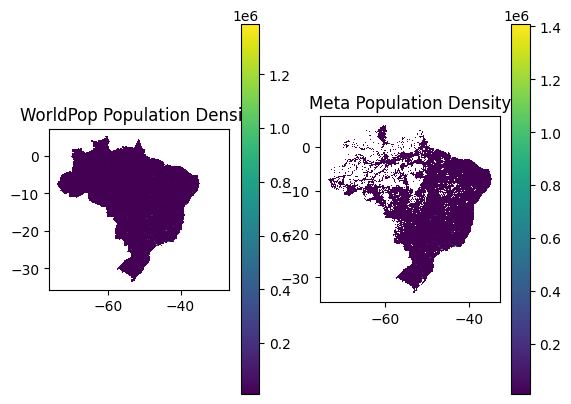

In [856]:
fig, ax = plt.subplots(1,2)
pop_bra_gdf.plot(column='population', ax=ax[0], vmin=10000, legend=True)
ax[0].set_title('WorldPop Population Density')
bra_meta_quad12.plot(column='population_2020', ax=ax[1], vmin=10000, legend=True)
ax[1].set_title('Meta Population Density')

In [861]:
bra_meta_quad12[bra_meta_quad12['index'].isin(high_fat)]['population_2020'].sum()

np.float64(26916763.08517337)

In [860]:
bra_meta_quad12[bra_meta_quad12['index']=='211021021210']

,index,population_2020,geometry
65502,211021021210,1.407832e+06,"POLYGON ((-38.4082 -12.98315, -38.4082 -12.897..."


In [858]:
pop_bra_gdf[pop_bra_gdf['population']==pop_bra_gdf['population'].max()]

,index,country_code,population,region_code,geometry
593758,211021021210,BRA,1.386135e+06,LCN,"POLYGON ((-38.4082 -12.98315, -38.4082 -12.897..."


In [849]:
bra_meta['population_2020'].sum()

np.float64(214494623.51942614)

In [834]:
pop_national_total[pop_national_total['country_code'].isin(['MEX', 'BRA'])]

,country_code,totalPopulation,region_code
15,BRA,2.025580e+08,LCN
71,MEX,1.289328e+08,LCN
